#  Argmentation
* 과대적합을 해결하기 위해 데이터를 증식시켜 데이터 수를 증가시키는 기법
* 데이터 증식

## 1. Google Drive와 연동하기

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls gdrive/'My Drive'/'Colab Notebooks'/CNN/datasets

cats_and_dogs_small  cats_and_dogs_small_1.h5


In [ ]:
cd gdrive/My Drive/Colab Notebooks/CNN/datasets

/content/gdrive/My Drive/Colab Notebooks/CNN/datasets


In [ ]:
import os
base_dir = '/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small'
train_cats_dir = os.path.join(base_dir, 'train', 'cats')
print(train_cats_dir)

/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small/train/cats


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

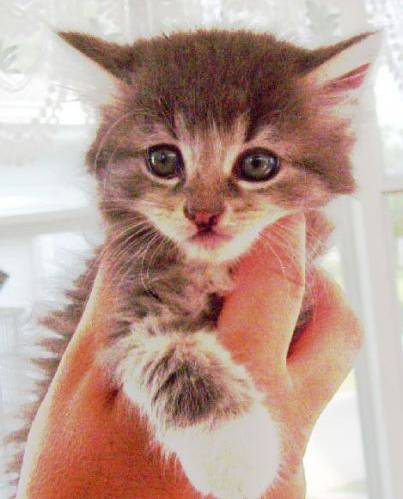

In [ ]:
frame = os.path.join(train_cats_dir, 'cat.100.jpg')
img = load_img(frame)
img

In [ ]:
img_data = img_to_array(img)

In [ ]:
img_data

array([[[224., 225., 220.],
        [223., 224., 219.],
        [223., 224., 219.],
        ...,
        [245., 242., 249.],
        [245., 242., 249.],
        [245., 242., 249.]],

       [[222., 223., 218.],
        [222., 223., 218.],
        [223., 224., 219.],
        ...,
        [247., 244., 251.],
        [247., 244., 251.],
        [247., 244., 251.]],

       [[220., 221., 216.],
        [221., 222., 217.],
        [221., 222., 217.],
        ...,
        [247., 246., 252.],
        [248., 247., 253.],
        [248., 247., 253.]],

       ...,

       [[211., 215., 224.],
        [213., 217., 226.],
        [210., 215., 221.],
        ...,
        [217., 211., 211.],
        [217., 211., 211.],
        [217., 211., 211.]],

       [[211., 215., 224.],
        [213., 217., 226.],
        [210., 215., 221.],
        ...,
        [217., 211., 211.],
        [217., 211., 211.],
        [217., 211., 211.]],

       [[211., 215., 224.],
        [213., 217., 226.],
        [210., 2

In [ ]:
img_data.shape

(499, 403, 3)

In [ ]:
from numpy import expand_dims

sample = expand_dims(img_data, 0)
sample.shape # 배치로 만들어 주기 위해 한 차원 확장

(1, 499, 403, 3)

## 2. 수평이동

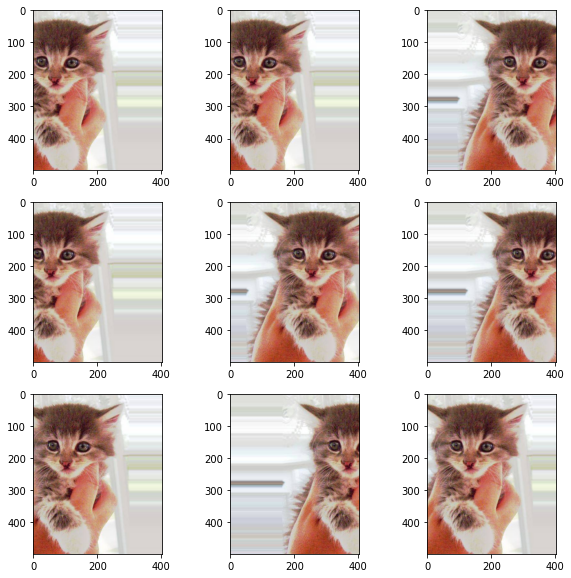

In [ ]:
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(width_shift_range=0.5)

it = datagen.flow(sample, batch_size = 1)
fig = plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

* 범위 변경

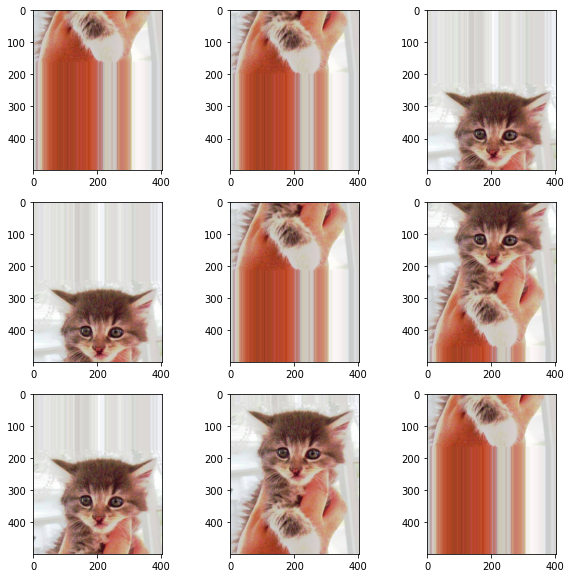

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.7)

it = datagen.flow(sample, batch_size = 1)
fig = plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

## 3. 반전

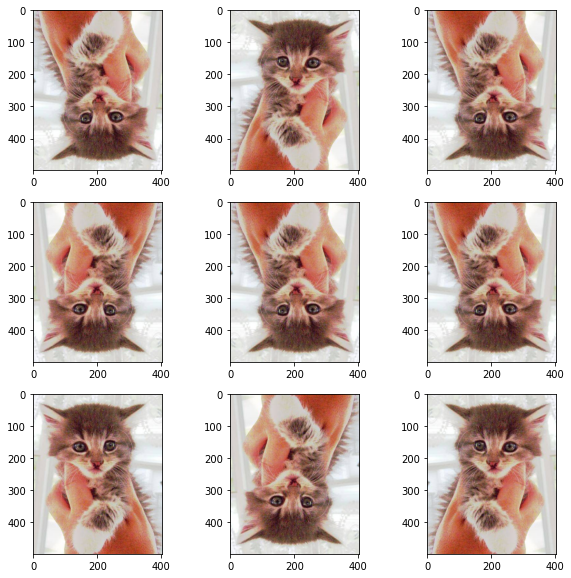

In [ ]:
datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip=True)

it = datagen.flow(sample, batch_size = 1)
fig = plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

## 4. 회전

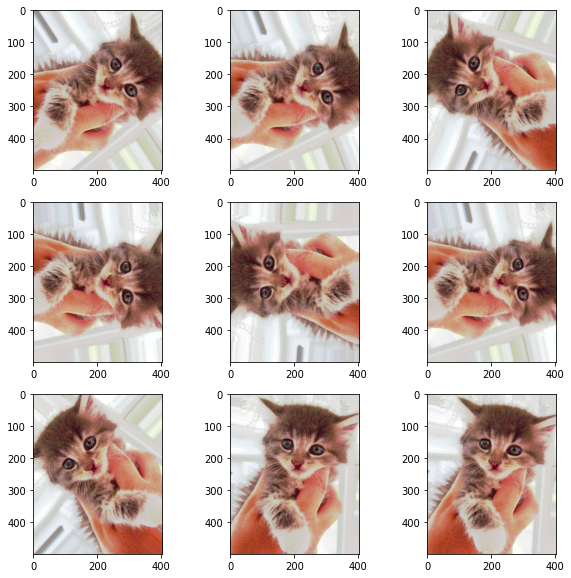

In [ ]:
datagen = ImageDataGenerator(rotation_range = 90)

it = datagen.flow(sample, batch_size = 1)
fig = plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

## 5. 밝기 

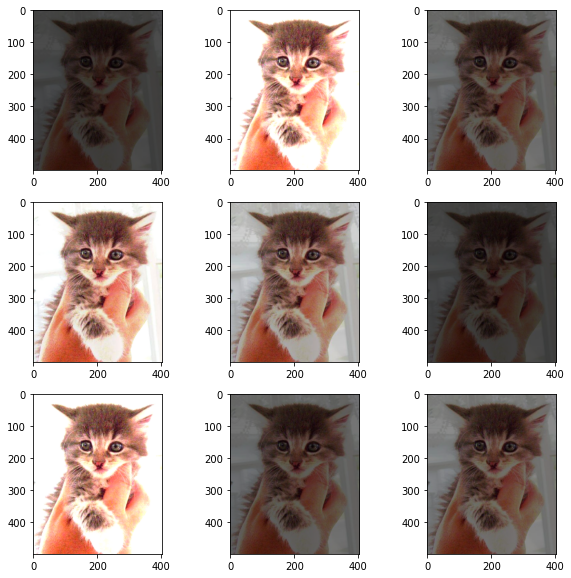

In [ ]:
datagen = ImageDataGenerator(brightness_range = [0.2, 1.5])

it = datagen.flow(sample, batch_size = 1)
fig = plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

## 6. 줌

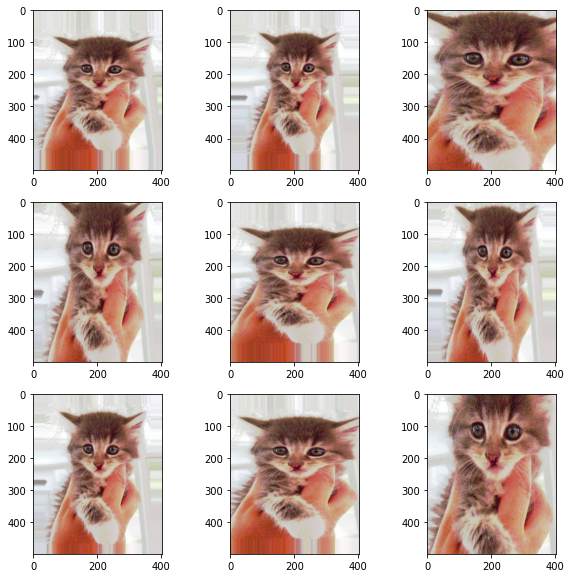

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.4)

it = datagen.flow(sample, batch_size = 1)
fig = plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

## 7. 복수 적용

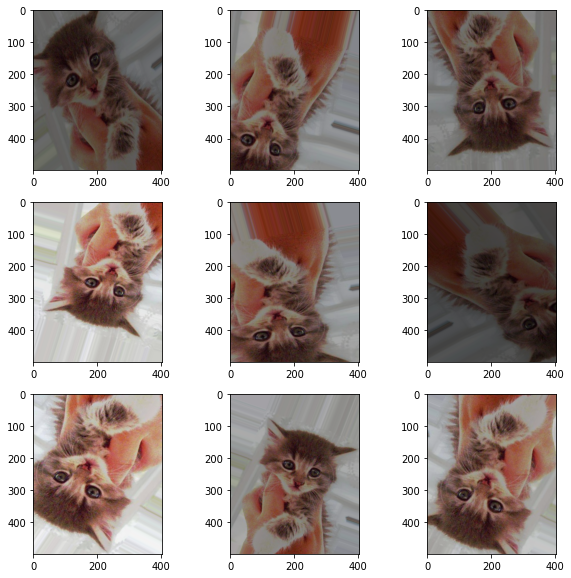

In [ ]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                             horizontal_flip=True, vertical_flip=True, brightness_range=[0.2,1.0], fill_mode='nearest')

it = datagen.flow(sample, batch_size = 1)
fig = plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()